In [55]:
import pandas as pd
import sys
import tensorflow as tf
import re
import nltk

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 19.4/19.4 MB 43.7 MB/s eta 0:00:00
     ------------------------------------- 345.2/345.2 kB 20.9 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\김지웅\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
df=nltk.corpus.gutenberg.raw('whitman-leaves.txt')
df

'[Leaves of Grass by Walt Whitman 1855]\n\n\nCome, said my soul,\nSuch verses for my Body let us write, (for we are one,)\nThat should I after return,\nOr, long, long hence, in other spheres,\nThere to some group of mates the chants resuming,\n(Tallying Earth\'s soil, trees, winds, tumultuous waves,)\nEver with pleas\'d smile I may keep on,\nEver and ever yet the verses owning--as, first, I here and now\nSigning for Soul and Body, set to them my name,\n\nWalt Whitman\n\n\n\n[BOOK I.  INSCRIPTIONS]\n\n}  One\'s-Self I Sing\n\nOne\'s-self I sing, a simple separate person,\nYet utter the word Democratic, the word En-Masse.\n\nOf physiology from top to toe I sing,\nNot physiognomy alone nor brain alone is worthy for the Muse, I say\n    the Form complete is worthier far,\nThe Female equally with the Male I sing.\n\nOf Life immense in passion, pulse, and power,\nCheerful, for freest action form\'d under the laws divine,\nThe Modern Man I sing.\n\n\n\n}  As I Ponder\'d in Silence\n\nAs I pon

In [7]:
print(df[:3000])

[Leaves of Grass by Walt Whitman 1855]


Come, said my soul,
Such verses for my Body let us write, (for we are one,)
That should I after return,
Or, long, long hence, in other spheres,
There to some group of mates the chants resuming,
(Tallying Earth's soil, trees, winds, tumultuous waves,)
Ever with pleas'd smile I may keep on,
Ever and ever yet the verses owning--as, first, I here and now
Signing for Soul and Body, set to them my name,

Walt Whitman



[BOOK I.  INSCRIPTIONS]

}  One's-Self I Sing

One's-self I sing, a simple separate person,
Yet utter the word Democratic, the word En-Masse.

Of physiology from top to toe I sing,
Not physiognomy alone nor brain alone is worthy for the Muse, I say
    the Form complete is worthier far,
The Female equally with the Male I sing.

Of Life immense in passion, pulse, and power,
Cheerful, for freest action form'd under the laws divine,
The Modern Man I sing.



}  As I Ponder'd in Silence

As I ponder'd in silence,
Returning upon my poems, c

토큰화

In [36]:
data = pd.DataFrame(sent_tokenize(df), columns=['raw text'])

In [37]:
data

,raw text
0,[Leaves of Grass by Walt Whitman 1855]\n\n\nCo...
1,"Of physiology from top to toe I sing,\nNot phy..."
2,"Of Life immense in passion, pulse, and power,\..."
3,As I Ponder'd in Silence\n\nAs I ponder'd in s...
4,"it said,\nKnow'st thou not there is hut one th..."
...,...
3822,Now for my last--let me look back a moment;\nT...
3823,"Long have we lived, joy'd, caress'd together;\..."
3824,"Yet let me not be too hasty,\nLong indeed have..."
3825,May-be it is you the mortal knob really undoin...


In [38]:
def rev_punc(x) :#rev_punc() 함수 문장부호, 특수기호 없애는 함수
    new = []
    for i in x:
        if i not in string.punctuation:
            new.append(i)
    new = ''.join(new)
    return new

In [39]:
import string

In [41]:
data['rev_punc_text'] = data['raw text'].apply(rev_punc)
data

,raw text,rev_punc_text
0,[Leaves of Grass by Walt Whitman 1855]\n\n\nCo...,Leaves of Grass by Walt Whitman 1855\n\n\nCome...
1,"Of physiology from top to toe I sing,\nNot phy...",Of physiology from top to toe I sing\nNot phys...
2,"Of Life immense in passion, pulse, and power,\...",Of Life immense in passion pulse and power\nCh...
3,As I Ponder'd in Silence\n\nAs I ponder'd in s...,As I Ponderd in Silence\n\nAs I ponderd in sil...
4,"it said,\nKnow'st thou not there is hut one th...",it said\nKnowst thou not there is hut one them...
...,...,...
3822,Now for my last--let me look back a moment;\nT...,Now for my lastlet me look back a moment\nThe ...
3823,"Long have we lived, joy'd, caress'd together;\...",Long have we lived joyd caressd together\nDeli...
3824,"Yet let me not be too hasty,\nLong indeed have...",Yet let me not be too hasty\nLong indeed have ...
3825,May-be it is you the mortal knob really undoin...,Maybe it is you the mortal knob really undoing...


In [42]:
list_reg = []

for i in data.rev_punc_text:
    text = re.sub('[^a-zA-Z0-9]', " ", i).strip()
    if (text != ''):
        list_reg.append(text)

In [43]:
list_reg

['Leaves of Grass by Walt Whitman 1855   Come said my soul Such verses for my Body let us write for we are one That should I after return Or long long hence in other spheres There to some group of mates the chants resuming Tallying Earths soil trees winds tumultuous waves Ever with pleasd smile I may keep on Ever and ever yet the verses owningas first I here and now Signing for Soul and Body set to them my name  Walt Whitman    BOOK I  INSCRIPTIONS    OnesSelf I Sing  Onesself I sing a simple separate person Yet utter the word Democratic the word EnMasse',
 'Of physiology from top to toe I sing Not physiognomy alone nor brain alone is worthy for the Muse I say     the Form complete is worthier far The Female equally with the Male I sing',
 'Of Life immense in passion pulse and power Cheerful for freest action formd under the laws divine The Modern Man I sing',
 'As I Ponderd in Silence  As I ponderd in silence Returning upon my poems considering lingering long A Phantom arose before me

In [44]:
token_sent = word_tokenize(str(list_reg))

In [45]:
eng_stops = set(stopwords.words('english'))

In [46]:
res_stops = [word for word in token_sent if word not in eng_stops]

In [47]:
my_tag_set = ['NN','VB','VBD','JJ','RB','UH']
my_word = [word for word, tag in nltk.pos_tag(res_stops) if tag in my_tag_set]

In [48]:
text_cntw = dict()
for word in my_word:
    text_cntw[word] = text_cntw.get(word,0) + 1

In [49]:
text_cntw

{'[': 1,
 'said': 23,
 'soul': 204,
 'Such': 6,
 'let': 28,
 'write': 5,
 'long': 192,
 'hence': 23,
 'group': 10,
 'soil': 21,
 'tumultuous': 6,
 'Ever': 3,
 'smile': 9,
 'keep': 17,
 'ever': 122,
 'yet': 197,
 'first': 52,
 'set': 5,
 'name': 43,
 'simple': 13,
 'separate': 16,
 'person': 30,
 'utter': 7,
 'word': 61,
 'Democratic': 2,
 'physiology': 4,
 'top': 9,
 'toe': 2,
 'Not': 84,
 'physiognomy': 3,
 'alone': 73,
 'brain': 22,
 'worthy': 9,
 'complete': 16,
 'worthier': 2,
 'far': 90,
 'equally': 14,
 'immense': 8,
 'passion': 10,
 'pulse': 13,
 'power': 30,
 'action': 10,
 'formd': 11,
 'silence': 16,
 'arose': 4,
 'distrustful': 1,
 'aspect': 1,
 'beauty': 33,
 'age': 37,
 'genius': 3,
 'old': 227,
 'flame': 12,
 'finger': 6,
 'many': 128,
 'immortal': 36,
 'voice': 79,
 'thou': 93,
 'theme': 10,
 "'And": 1,
 'fortune': 2,
 'perfect': 54,
 'also': 63,
 'war': 79,
 'longer': 6,
 'book': 21,
 'flight': 6,
 'advance': 20,
 'retreat': 5,
 'victory': 11,
 'deferrd': 2,
 'certain':

In [50]:
text_cntw_df = pd.DataFrame.from_dict(text_cntw, orient='index', columns = ['count'])

In [51]:
text_cntw_df = text_cntw_df.drop(index = ['[', ']'])
text_cntw_df.sort_values(by='count', ascending=False, inplace=True)

In [52]:
text_cntw_df

,count
life,229
old,227
soul,204
yet,197
long,192
...,...
culmination,1
labyrinth,1
junction,1
discord,1


In [53]:
from matplotlib import pyplot as plt

(-0.5, 999.5, 499.5, -0.5)

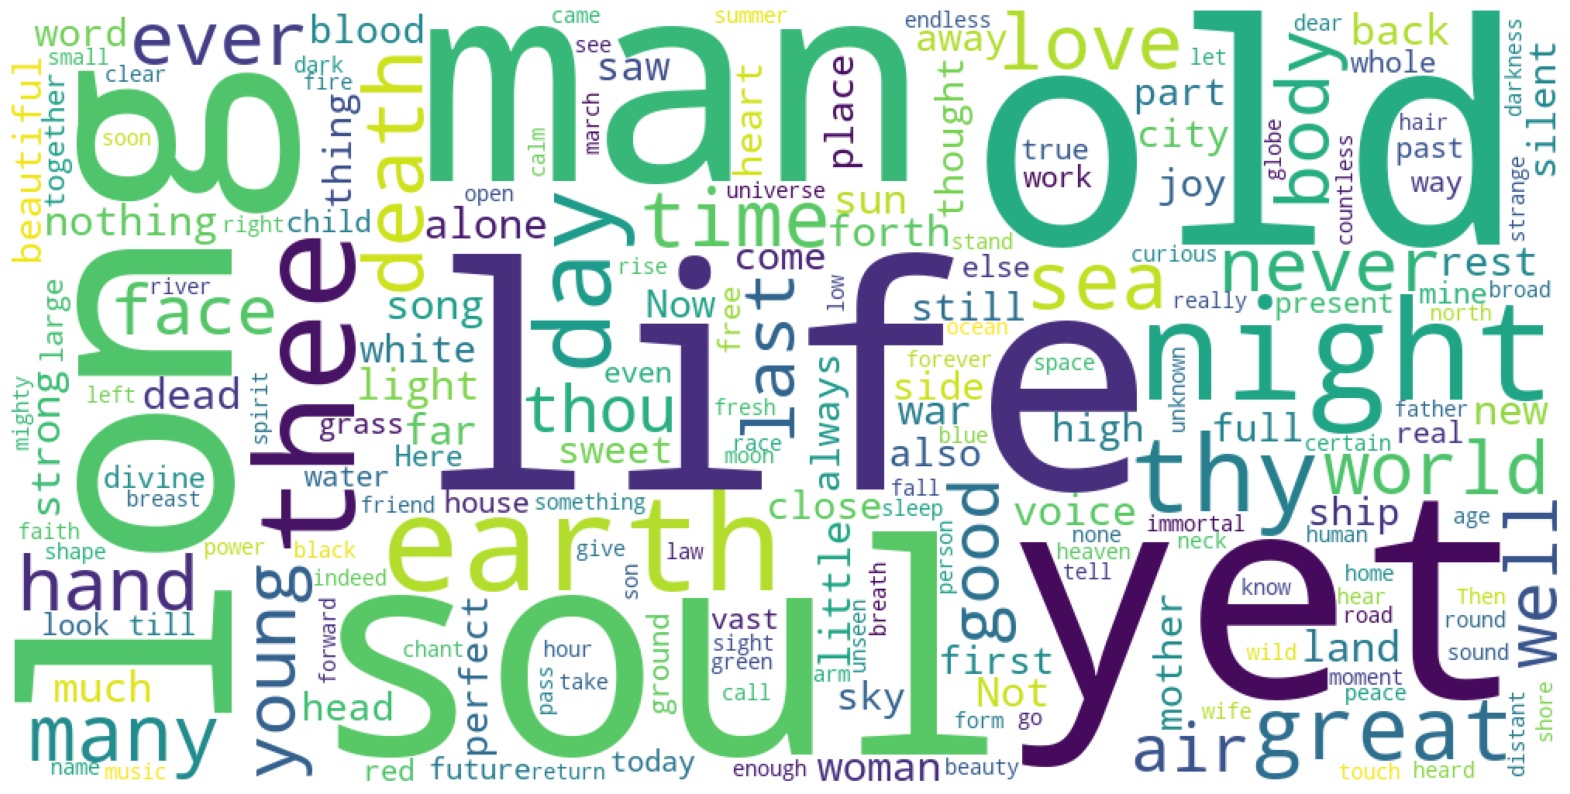

In [54]:
wc = WordCloud(width=1000, height = 500, max_font_size= 200, background_color='white')
wc.generate_from_frequencies(text_cntw)
plt.figure(figsize=(20, 40))
plt.imshow(wc)
plt.axis("off")